In [1]:
#EP PS4 Q1, Q2 and Q3

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

# Question 1

In [3]:
#function to SHIFT AN ARRAY by ARBITRARY AMOUNT
#use a CONVOLUTION

#arr will be shifted by the index specified by shift
#will fill in with zeros
def shift_arr(arr, shift):
    shift_arr = np.zeros(arr.shape[0])
    shift_arr[shift] = 1
    return np.convolve(arr, shift_arr, 'full')

#arr will be shifted by the index specified by shift
#will wrap around
def shift_and_wrap_arr(arr, shift):
    n = arr.shape[0]
    shift = np.mod(shift, n) #want to get shift in range 0-n
    
    #make this array twice as long so you get two copies of the signal
    shift_arr = np.zeros(2*n)
    shift_arr[shift] = 1
    shift_arr[n + shift] = 1
    
    #return the center indices with bits of both shifted copies so it wraps around
    return np.convolve(arr, shift_arr, 'full')[n:2*n]

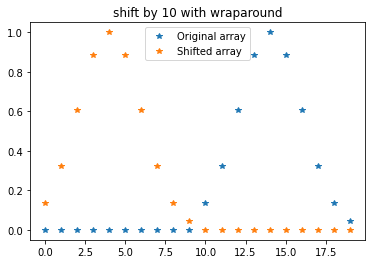

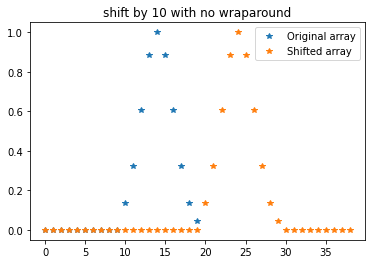

In [4]:
#test that the shift array works
n=20
x = np.linspace(1, 10, int(n/2))
y = np.zeros(n)

mu = 5
std = 2

#gaussian starting in center of array
y[int(n/2):] = np.exp( -1*(x - mu)**2/(2*std**2) )

#shift by half of the array length
shift=int(n/2)

y_shifted = shift_and_wrap_arr(y, shift)
y_shifted_zeros = shift_arr(y, shift)

mpl.figure()
mpl.plot(y, '*')
mpl.plot(y_shifted, '*')
mpl.legend(['Original array', 'Shifted array'])
mpl.title('shift by ' + repr(shift) + ' with wraparound')
mpl.show()

mpl.figure()
mpl.plot(y, '*')
mpl.plot(y_shifted_zeros, '*')
mpl.legend(['Original array', 'Shifted array'])
mpl.title('shift by ' + repr(shift) + ' with no wraparound')
mpl.show()

With the wraparound version, the gaussian that started in the center of the array (index 10) and shifted by half the array length has wrapped around to reappear at the beginning.

Without the wraparound, the gaussian simply shifts itself out of the original size of the array, as seen in the second figure.

# Question 2

In [5]:
#using corr = ift( dft(f) x conj*dft(g) )
#take the correlation function of two arrays
#using rffts would be faster but want to generalize for imaginary numbers
def corr(x, y):
    return np.fft.ifft( np.fft.fft(x) * np.conj( np.fft.fft(y)) )

max imaginary part should be zero or really small :  1.0459814387607915e-18


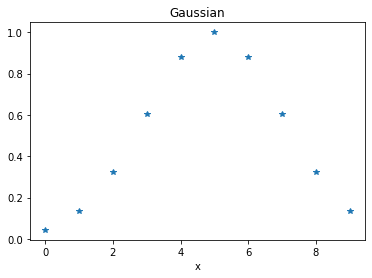

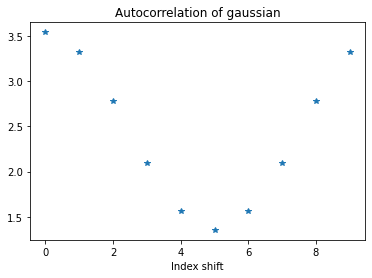

In [6]:
#test with gaussian
n=20
x = np.linspace(0, 9, int(n/2))

mu = 5
std = 2

gauss = np.exp( -1*(x - mu)**2/(2*std**2) )
gauss_corr = corr(gauss, gauss)

print('max imaginary part should be zero or really small : ', max(np.imag(gauss_corr)))
gauss_corr = np.real(gauss_corr)

mpl.figure()
mpl.title('Gaussian')
mpl.plot(x, gauss, '*')
mpl.xlabel('x')
mpl.show()

mpl.figure()
mpl.plot(gauss_corr, '*')
mpl.title('Autocorrelation of gaussian')
mpl.xlabel('Index shift')
mpl.show()


Autocorrelation of a gaussian: as we can see, it is highest when the correlation shift is zero; ie when the two gaussians overlap perfectly. It drops as one of the gaussians is shifted sideways to a minimum where they are most of of sync, then rises until they are nearly perfectly overlapping again. 

Note that the use of dfts in correlation function means that the gaussian will be wrapping around as it is shifted, otherwise you would not see the correlation function rising again.

Also note the autocorrelation should be real, get some tiny leftover imaginary bits that I removed.

# Question 3

In [7]:
#take correlation of a signal with itself, shifted by arbitrary amount
#note that this uses the wrapped shifted array
def autocorr_shift(x, shift):
    x_shifted = shift_and_wrap_arr(x, shift)
    return corr(x, x_shifted)

correlation should be real, max imaginary is : 9.06829694415593e-19


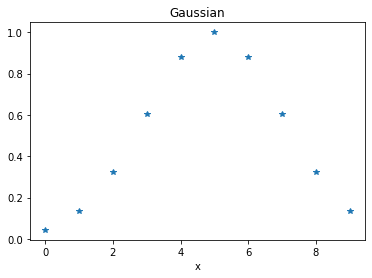

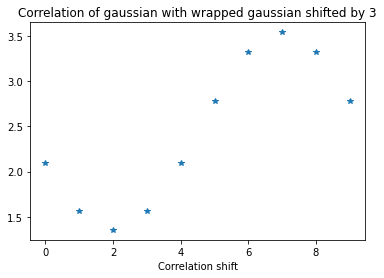

In [8]:
#test with gaussian
n=20
x = np.linspace(0, 9, int(n/2))

shift = 3

mu = 5
std = 2
gauss = np.exp( -1*(x - mu)**2/(2*std**2) )

gauss_corr_shifted = autocorr_shift(gauss, shift)
print('correlation should be real, max imaginary is :', max(np.imag(gauss_corr_shifted)))
gauss_corr_shifted = np.real(gauss_corr_shifted)

mpl.figure()
mpl.title('Gaussian')
mpl.plot(x, gauss, '*')
mpl.xlabel('x')
mpl.show()

mpl.figure()
mpl.plot(gauss_corr_shifted, '*')
mpl.title('Correlation of gaussian with wrapped gaussian shifted by ' + repr(shift))
mpl.xlabel('Correlation shift')
mpl.show()

OVERALL: the correlation function is shifted by the RELATIVE SHIFT between the two gaussians. For example, moving the second gaussian forward by three introduces a relative shift of -3. Moving the first gaussian forward by three would introduce a relative shift of +3. 

Why? Because the correlation function is itself shifting the second gaussian and looking at the overlap, so shifting one of the functions will offset the shifting the correlation is doing.

IN MY FIGURES:
In my correlation, the shifted gaussian is the second gaussian. Therefore, the correlation is maximum at the negative shift value (wrapped around to the last array index minus the shift value). This makes sense: if the second gaussian is shifted forwards by three, then shifting it backwards by three will make it overlap perfectly with the first gaussian and provide the highest autocorrelation value. Shifting backwards by three will wrap around to provide the maximum located three from the end.

So: shifting the second gaussians forwards by three shifts the correlation backwards by three (taking into account wraparound). This is demonstrated in the figures above, and makes sense.